# Lab 7 (2/24): Practice

### Web pages
Course page: https://ambujtewari.github.io/teaching/STATS306-Winter2020/

Lab page: https://rogerfan.github.io/stats306_w20/

### Office Hours
    Mondays: 2-4pm, USB 2165
    
### Contact
    Questions on problems: Use the slack discussions
    If you need to email me, include in the subject line: [STATS 306]
    Email: rogerfan@umich.edu

In [2]:
library(tidyverse)
# install.packages('nycflights13')
library(nycflights13)
library(forcats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Question 1

Assume each row in `mpg` corresponds to a different model of car. Which manufacturer produced the most 4-wheel drive models in 1999?

In [ ]:
mpg %>%
    filter(year == 1999, drv == 4) %>%
    group_by(manufacturer) %>%
    summarize(total = n()) %>%
    arrange(desc(total))

### Question 2

In the `flights` dataset, call the `airtime_delay` the difference between the actual airtime and the scheduled airtime of a flight. For each of the carriers with codes `'AA', 'UA, 'DL'`, calculate the mean `airtime_delay` per month and plot this using `ggplot`.

In [4]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


carrier,month,mean_airtime_delay
<chr>,<int>,<dbl>
AA,1,-70.66777
AA,2,-72.64735
AA,3,-74.43634
AA,4,-67.25557
AA,5,-75.18770
AA,6,-65.92807


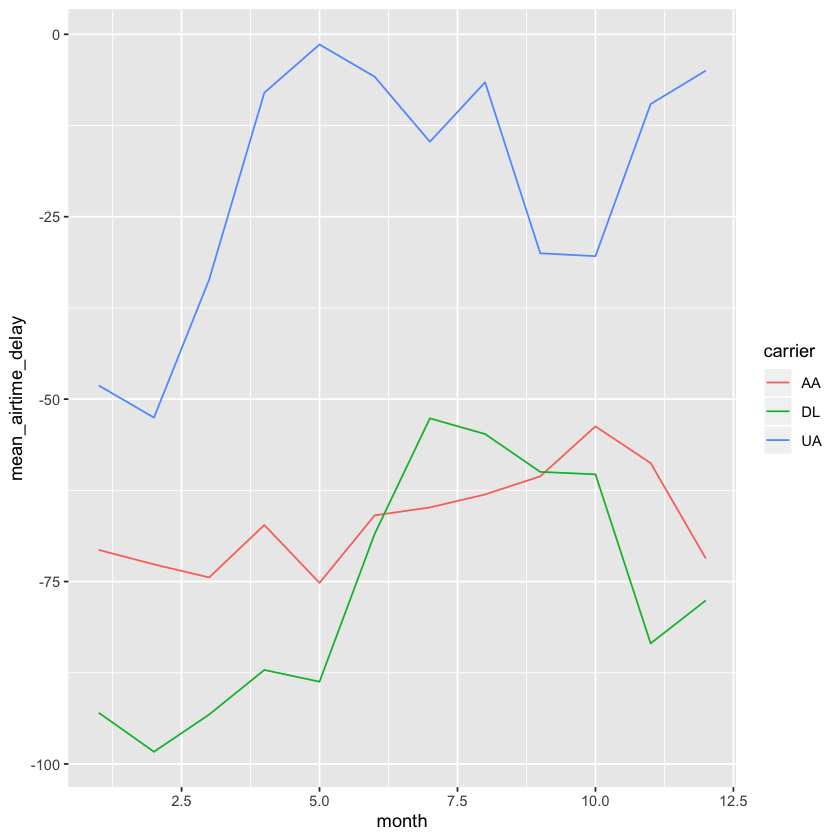

In [7]:
carrier_delays = flights %>%
    filter(carrier %in% c('AA', 'UA', 'DL')) %>%
    mutate(airtime_delay = air_time - (sched_arr_time - sched_dep_time)) %>%
    group_by(carrier, month) %>%
    summarize(mean_airtime_delay = mean(airtime_delay, na.rm=TRUE))

head(carrier_delays)

ggplot(carrier_delays, aes(x=month, y=mean_airtime_delay, color=carrier)) +
    geom_line()

### Question 3

The following code downloads a dataset of college football games. Using the dataset `cfb`, find the number of conference and non-conference games (see `conf_game`) that Michigan played over this time period. What were Michigan's in- and out-of-conference winrates? You should be able to get all these numbers in a single table.

In [9]:
load(url('https://github.com/rogerfan/stats306_w20/raw/master/labs/cfb.RData'))

In [11]:
head(cfb)
glimpse(cfb)

year,game,count,conf_game,week,winning,winning_conference,winning_h_a_n,winning_points,winning_f_u,⋯,losing_total_plays,losing_total_yards,losing_ypp,losing_to,losing_pen_yards,losing_top,ot?,thursday?,top_verification,o_u_total
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>
2011,1,1,Y,1,FIU,Sun Belt,H,41,F,⋯,73,301,4.12,1,45,1967,N,Y,3600,NA
2011,2,1,N,1,Wisconsin,Big 10,H,51,F,⋯,65,292,4.49,0,65,2060,N,Y,3600,NA
2011,3,1,N,1,Mississippi State,SEC,A,59,F,⋯,87,338,3.89,3,55,2240,N,Y,3600,NA
2011,4,1,N,1,Syracuse,Big East,H,36,F,⋯,84,406,4.83,1,94,2024,Y,Y,3600,NA
2011,5,1,N,1,Bowling Green,MAC,A,32,U,⋯,65,280,4.31,3,45,1181,N,Y,3600,NA
2011,6,1,N,1,Kentucky,SEC,N,14,F,⋯,69,234,3.39,4,120,2040,N,Y,3600,NA


Observations: 5,116
Variables: 50
$ year                 <int> 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, …
$ game                 <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ count                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ conf_game            <chr> "Y", "N", "N", "N", "N", "N", "N", "N", "N", "N"…
$ week                 <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1"…
$ winning              <chr> "FIU", "Wisconsin", "Mississippi State", "Syracu…
$ winning_conference   <chr> "Sun Belt", "Big 10", "SEC", "Big East", "MAC", …
$ winning_h_a_n        <chr> "H", "H", "A", "H", "A", "N", "H", "H", "H", "H"…
$ winning_points       <int> 41, 51, 59, 36, 32, 14, 50, 42, 17, 42, 24, 27, …
$ winning_f_u          <chr> "F", "F", "F", "F", "U", "F", "U", "F", "F", "F"…
$ winning_cover        <chr> "Y", "N", "Y", "Y", "Y", "N", "Y", "Y", "N", "N"…
$ winning_spread       <dbl> 13.0, 35.0, 30.5, 6.0, 6.0, 17.0, 4.0, 31.5, 19.…
$ winning_o_u     

In [13]:
cfb %>%
    filter(winning == 'Michigan' | losing == 'Michigan') %>%
    mutate(michigan_win = winning == 'Michigan') %>%
    group_by(conf_game) %>%
    summarize(win_perc = mean(michigan_win), num=n())

conf_game,win_perc,num
<chr>,<dbl>,<int>
N,0.7000000,30
Y,0.6206897,58


### Question 4

The dataset `gss_cat` contains survey surveys of individuals from 2002 to 2014. 

Using this datset, categorize individuals who self-identify as `Protestant`, `Catholic`, `None`, and `Other`, where `Other` contains all other values of `relig`. Note that the easiest way to do this is to use the function `replace` within a `dplyr` function, but there are also solutions using `recode` or `case_when`. 

Construct a table that contains the proportion of each religious category by year. The table should look something like:
```
# A tibble: 32 x 3
# Groups:   year [8]
    year relig      proportion
   <int> <fct>           <dbl>
 1  2000 Other          0.0777
 2  2000 None           0.141 
 3  2000 Catholic       0.241 
 4  2000 Protestant     0.540 
 5  2002 Other          0.0915
 6  2002 None           0.137 
 7  2002 Catholic       0.243 
 8  2002 Protestant     0.528 
 9  2004 Other          0.0960
10  2004 None           0.143 
# … with 22 more rows
```

With this table, create a bar plot that shows how the religious makeup has changed over the time period.

In [14]:
head(gss_cat)

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


In [17]:
year_religion = gss_cat %>%
    mutate(relig = replace(relig, !(relig %in% c('Catholic', 'Protestant', 'None')), 'Other')) %>%
    group_by(year, relig) %>%
    summarize(count=n()) %>%
    mutate(proportion = count / sum(count))

head(year_religion)

year,relig,count,proportion
<int>,<fct>,<int>,<dbl>
2000,Other,219,0.07774228
2000,None,398,0.14128506
2000,Catholic,679,0.24103656
2000,Protestant,1521,0.53993610
2002,Other,253,0.09150090
2002,None,379,0.13707052


### Question 5

Again using `gss_cat`, assume that missing values of `tvhours` mean zero hours watched. Calculate the mean tvhours for each age for both married and unmarried individuals (you can assume everyone who didn't answer `'Married'` is unmarried). 

Plot of scatter plot of mean tvhours by age for married and unmarrier. Include smoothing lines for each category.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


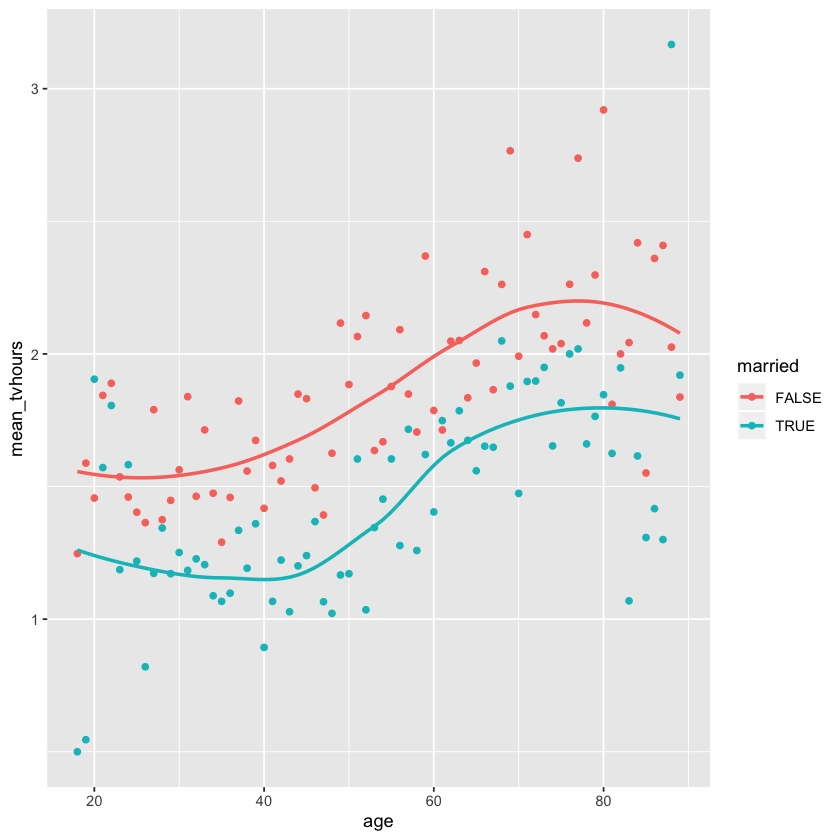

In [22]:
tvhours_byage = gss_cat %>%
    mutate(tvhours = ifelse(is.na(tvhours), 0, tvhours)) %>%
    mutate(married = marital == 'Married') %>%
    group_by(married, age) %>%
    summarize(mean_tvhours = mean(tvhours))

ggplot(tvhours_byage, aes(x=age, y=mean_tvhours, color=married)) +
    geom_point() + geom_smooth(se=FALSE)

### Question 6

This question uses the `flights` and `weather` tables. Say a day was rainy at a particular airport if a) the minimum temperature for the day and airport was above freezing, and b) precipitation occurred during one or more hours in the day.

In total, how many departures were scheduled during rainy days in 2013?

### Question 7

Use the dataset you created in the above question.

Cancelled flights have missing values of `dep_time`. By month, what percentage of cancelled flights in 2013 were on rainy days?

To check your work, I got that roughly 60.3% of cancelled flights in April were on rainy days.